# How do you speak Matplotlib?

A *matplotlib* visualization is a `figure` onto which is attached one or more `axes`. Each `axes` has a horizontal (x) `axis` and vertical (y) `axis`, and the data is encoded using color and glyphs such as `markers` (for example circles) or `lines` or polygons (called `patches`). The figure below annotates these parts of a visualization and was created by Nicolas P. Rougier using `matplotlib`. The source code can be found in the [matplotlib documentation](https://matplotlib.org/gallery/showcase/anatomy.html#sphx-glr-gallery-showcase-anatomy-py).

![Diagram of the components of the matplotlib generated visualization.](../images/mpl_anatomy.png)

# Import matplotlib & tell Jupyter to draw things

In [1]:
%config InlineBackend.figure_format = 'retina'  # change this to png if your plots are too small
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### What is this backend thing?

Backends are the rendering engines matplotlib use to transform the Python code into pixels on the screen. Matplotlib supports many different static and interactive [backends](https://matplotlib.org/3.1.0/api/index_backend_api.html). 

The following line of code prints the current backend:

In [2]:
import matplotlib
matplotlib.get_backend()

'module://matplotlib_inline.backend_inline'

We told matplotlib to use the ipython inline backend when we typed `%matplotlib inline`

the `inline` backend results in static, non-interactive images.  Later in this tutorial we will cover how to use interactive backends in the notebook.

# Let's make that figure

A Matplotlib [figure](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure) is like an empty sheet of paper (or a blank canvas) on which we will draw all our plots, images, and diagrams. Here, the ipython backend decided to not render anything because we have not yet added any plots to our figure.

In [3]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

# Figure+ Axes (plotting surface)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

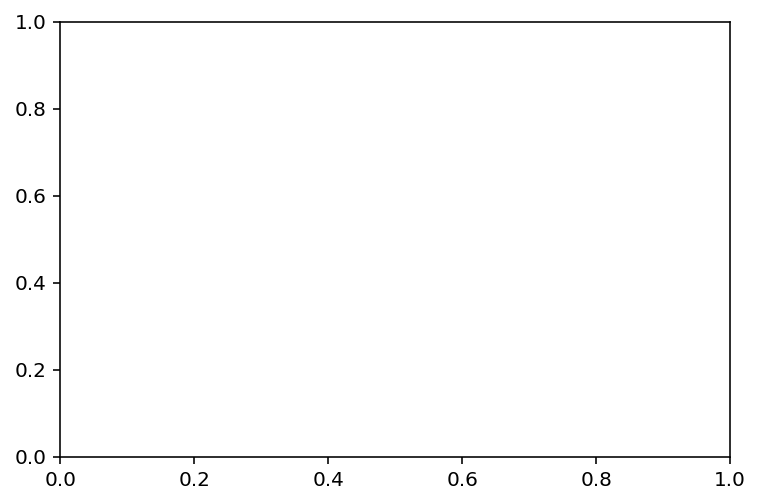

In [4]:
plt.subplots()

The x and y ticks and the box let us know that the axes was created. Let's assign the output of `plt.subplots`-which is a helper function that creates the figure and axes-to variables so that we can manipulate the figure and axes directly. 

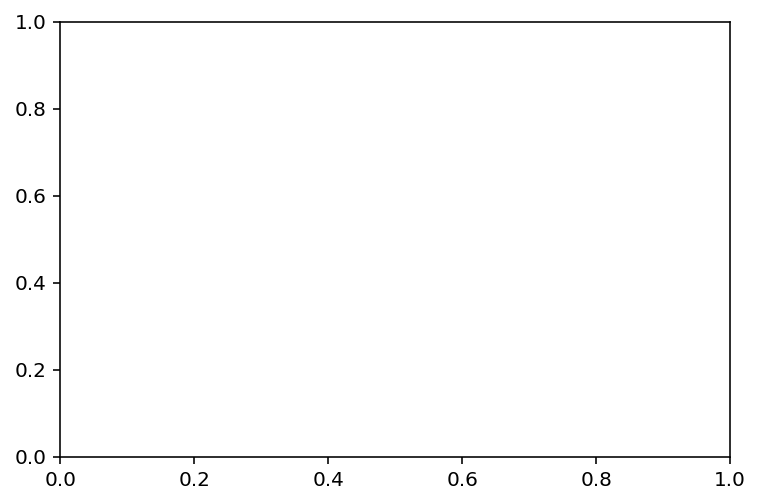

In [5]:
fig, ax = plt.subplots()

## Adjusting figure size
We can make the figure bigger or smaller using the `figsize=(width, height)` keyword construction. The default is 8x6

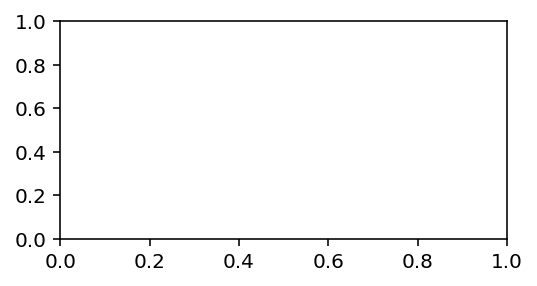

In [6]:
fig, ax = plt.subplots(figsize=(4,2))

# Add data to the figure using a plotting method

First, lets use `Pandas` to open our titanic dataset so that we have something to plot!

In [7]:
import pandas as pd
df = pd.read_csv("http://bit.ly/tcsv19")

Matplotlib supports many, many, many different plot types. Peruse the [gallery](https://matplotlib.org/gallery.html) to find some you like! 

A hopefully full list of supported plot methods is at https://matplotlib.org/3.1.0/api/axes_api.html#plotting 

Here we will use the `ax.plot` method from our installation test. This function is usually used to create line plots, but it can be used to create scatter plots when the marker is set to `'o'`. We use `.plot` here instead of `.scatter` so that we do not have to generate x-values to plot against.

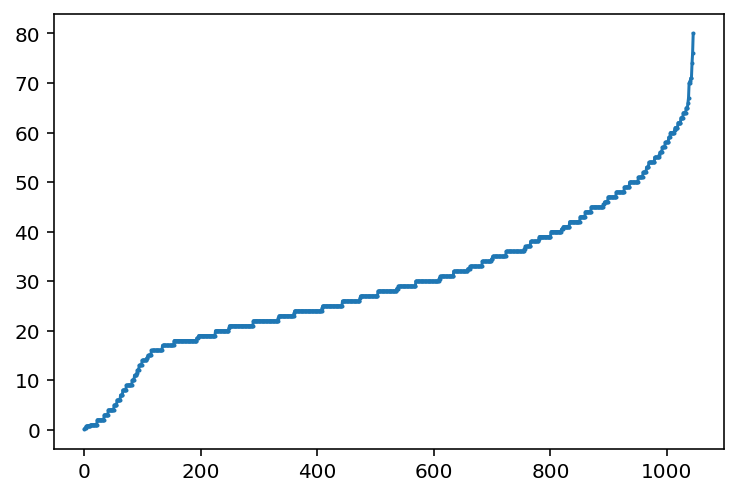

In [8]:
fig, ax = plt.subplots()
_ = ax.plot(np.sort(df['age']), marker='o', markersize=1)

__troubleshooting__:
If your figure looks "fuzzy" it is likely you have a hi-dpi (aka 'retnia' display), try running

```ipython
%config InlineBackend.figure_format = 'retina'  # tell IPython to use hi-dpi pngs
```   
And then re-rendering your figure by typing `<shift> + <enter>` in the above notebook cell.

# What are we plotting? Let's label

You can label almost everything in matplotlib. The most commonly used labeling methods are to set the:
* title: `set_title`
* x axis label: `set_xlabel`
* y axis label: `set_ylabel`

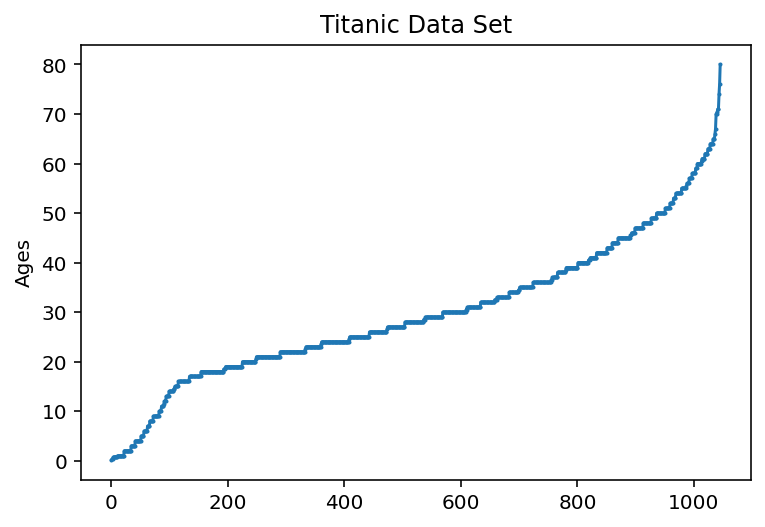

In [9]:
fig, ax = plt.subplots()
_ = ax.set_title ("Titanic Data Set")
_ = ax.plot(np.sort(df['age']), marker='o', markersize=1)
_ = ax.set_ylabel("Ages")

# Let's change up the y axis

Instead of breaking the ages up by 10, lets use the US census demographic groupings:
 * Children: 0–14 years
 * Youth: 15–24 years 
 * Adult: 25–54 years 
 * Older Adult: 55–64 years
 * Senior: 65 years and over

Ticks can primarily be customized in two ways:
* [Locators](https://matplotlib.org/3.1.1/gallery/ticks_and_spines/tick-locators.html): where the tick is
* [Formatters](https://matplotlib.org/3.1.1/gallery/ticks_and_spines/tick-formatters.html): what the tick looks like

First we use the `.set_yticks()` method to place our ticks according to the demographic group.

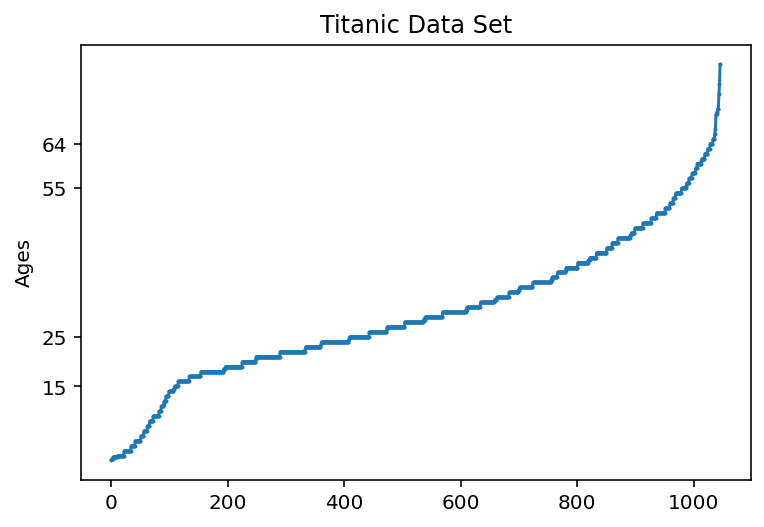

In [10]:
fig, ax = plt.subplots()
_ = ax.set_title ("Titanic Data Set")
_ = ax.plot(np.sort(df['age']), marker='o', markersize=1)
_ = ax.set_ylabel("Ages")
_ = ax.set_yticks([15,25, 55, 64])

 Now we use `.set_yticklabels()` to replace the labels that were automatically generated based on the tick locations with manually defined labels. 

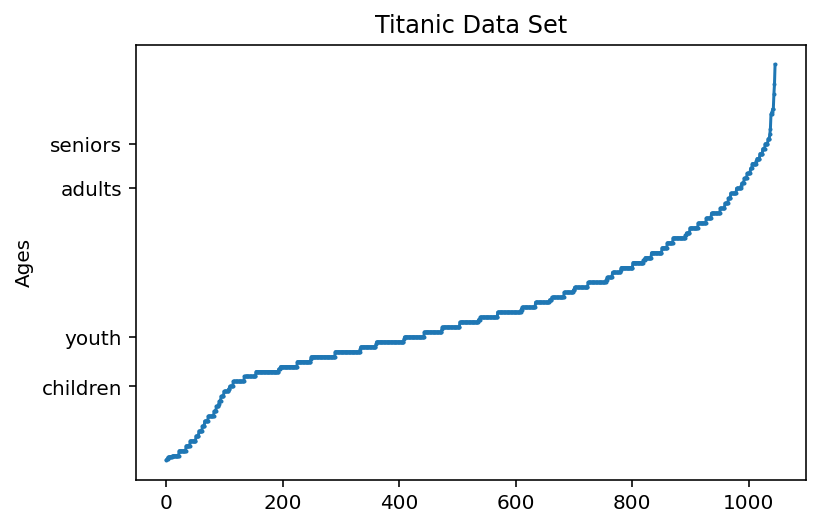

In [11]:
fig, ax = plt.subplots()
_ = ax.set_title ("Titanic Data Set")
_ = ax.plot(np.sort(df['age']), marker='o', markersize=1)
_ = ax.set_ylabel("Ages")
_ = ax.set_yticks([15,25, 55, 64])
_ = ax.set_yticklabels(['children', 'youth', 'adults', 'seniors'])

# Putting it all together: Let's look at fares!

* First Class Suite- £870 or $4,350

* First Class Berth- £30 or $150

* Second Class- £12 or $60

* Third Class- £3 to £8 or $40

source: (Wilkinson & Hamilton, 2011) from [Titanic: The Whole Iceberg](https://autumnmccordckp.weebly.com/tickets-and-accomodations.html)

## Tasks
1. Create a figure and an axis
2. Plot the "fare" column
3. Label the y-axis "fare"
4. Set the y tick locations using the fare class boundaries: [3, 12, 30, 870]
5. Set the y tick labels using the fare class boundaries: [3rd, 2nd, 1st B, 1st S]

/tmp/ipykernel_214762/598106299.py:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  _ = ax2.plot(np.sort(df['fare']), marker='o', markersize=5, lineStyle="")


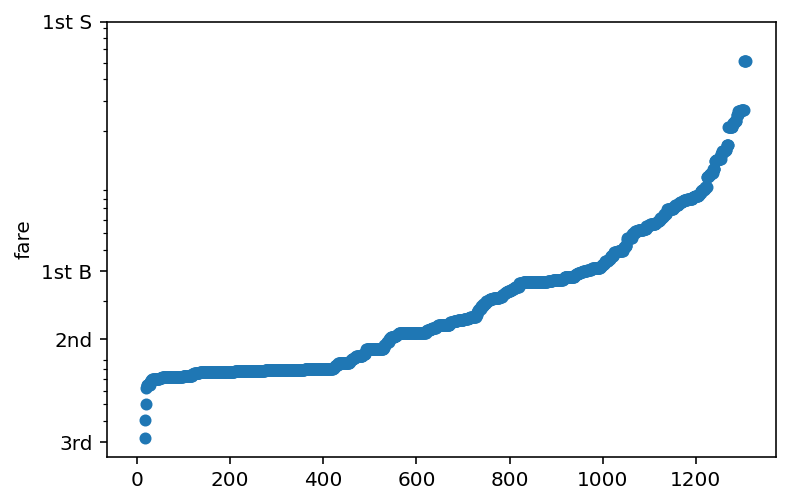

In [25]:
fig2, ax2 = plt.subplots()
_ = ax2.plot(np.sort(df['fare']), marker='o', markersize=5, lineStyle="")
_ = ax2.set_ylabel('fare')
_ = ax2.set_yscale('log')
_ = ax2.set_yticks([3,12,30,870])
_ = ax2.set_yticklabels(['3rd','2nd','1st B','1st S'])

# Let's put more than one image on the page

Matplotlib offers a lot of flexibility in creating images that have multiple figures, and you can read all about them in the [customizing figures tutorial](https://matplotlib.org/3.1.1/tutorials/intermediate/gridspec.html#sphx-glr-tutorials-intermediate-gridspec-py). We will briefly touch on using subplots, constrained_layout, and a drop of grid_spec. 

## Multiple Axes

Let's put our two axes together on one figure, using `subplots` with the ncols kwarg to create a figure with two axes side by side. 

We can use the `Figure` method `suptitle` to put a figure-level title on the plot.

Text(0.5, 0.98, 'Next To (1x2)')

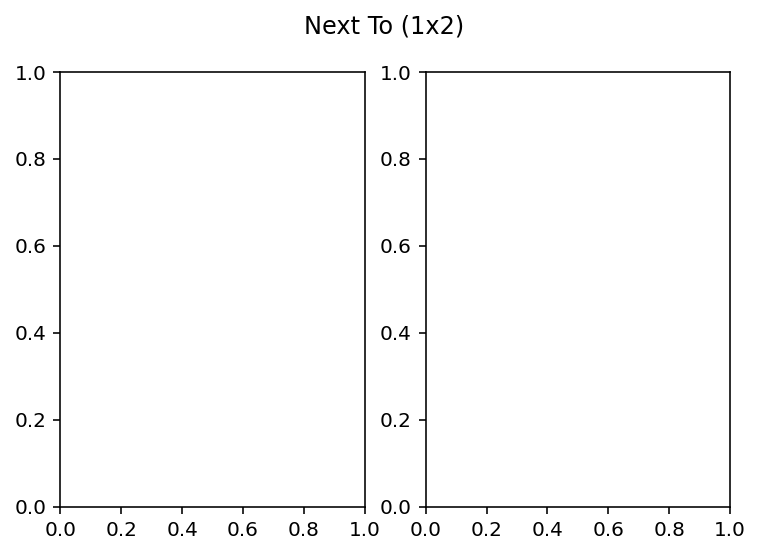

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.suptitle('Next To (1x2)')

If you want the axes to be one under the other, you can use `plt.subplots(nrows=2)`. You can also create a grid using `plt.subplots(ncols=2, nrows=2)`. In the grid case, plt.subplots returns a (nrows, ncols) shaped array of axes objects. 

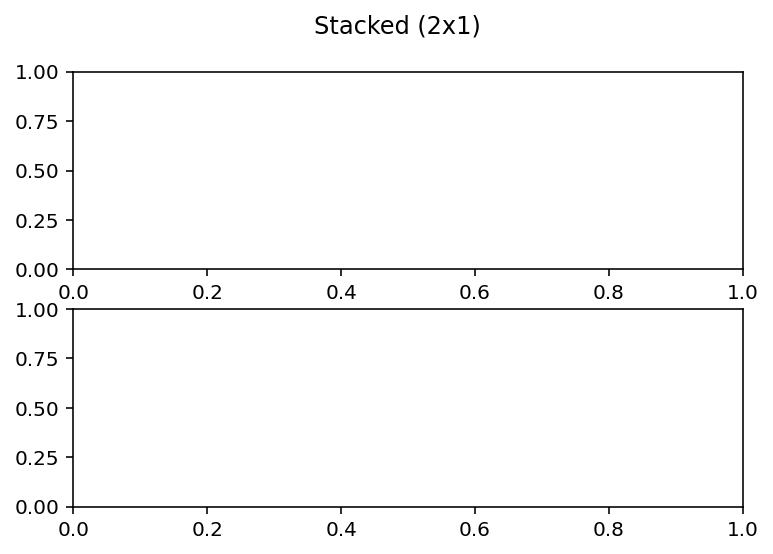

In [27]:
fig, (ax1, ax2) = plt.subplots(nrows=2)
_ = fig.suptitle('Stacked (2x1)')

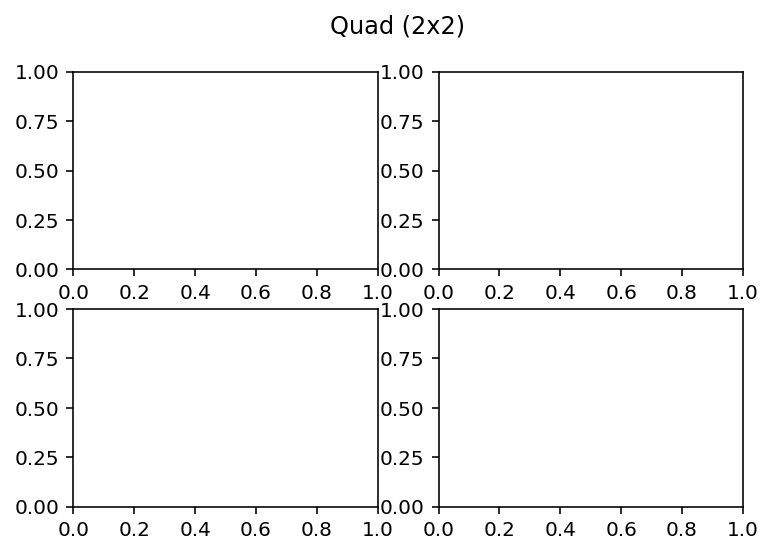

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=2)
_ = fig.suptitle('Quad (2x2)')

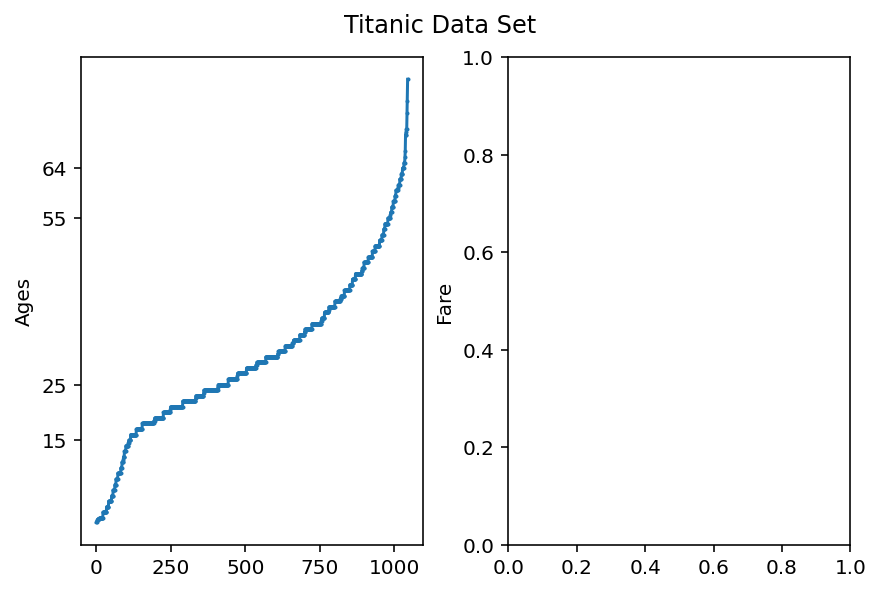

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, constrained_layout=True)
_ = fig.suptitle("Titanic Data Set")
_ = ax1.plot(np.sort(df['age']), marker='o', markersize=1)
_ = ax1.set_ylabel("Ages")
_ = ax1.set_yticks([15,25, 55, 64])
_ = ax2.set_ylabel('Fare')

## Yuck, crowded! Constrained Layout

[Constrained layout](https://matplotlib.org/3.1.1/tutorials/intermediate/constrainedlayout_guide.html) is matplotlib automagic that tries to place all the elements of the image on the page such that they don't overlap but the image still has breathing room and the users instructions are respected. It is especially useful when plotting multiple images. 

/tmp/ipykernel_214762/4207751438.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  _ = ax2.plot(np.sort(df['fare']), marker='o', markersize=5, lineStyle="")


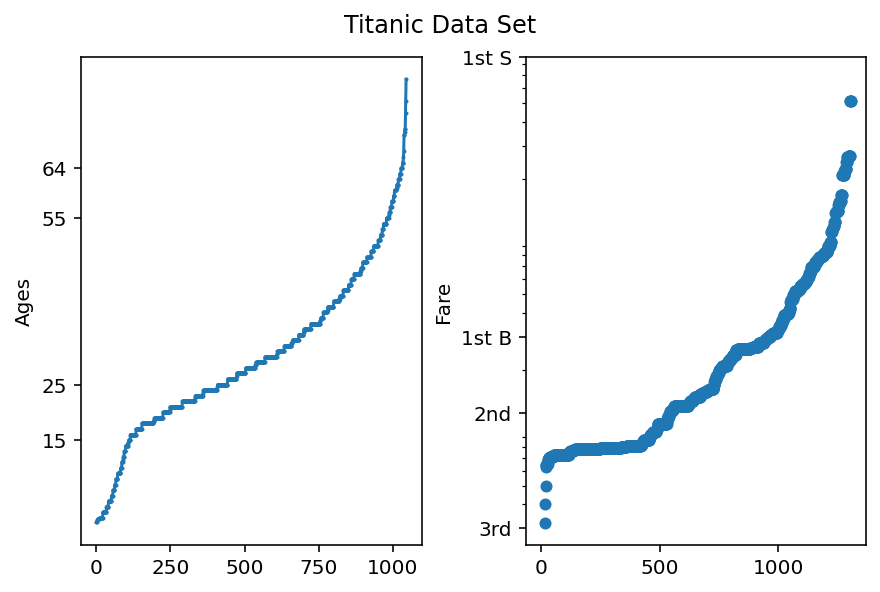

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols=2, constrained_layout=True)
_ = fig.suptitle("Titanic Data Set")
_ = ax1.plot(np.sort(df['age']), marker='o', markersize=1)
_ = ax1.set_ylabel("Ages")
_ = ax1.set_yticks([15,25, 55, 64])
_ = ax2.set_ylabel('Fare')
_ = ax2.plot(np.sort(df['fare']), marker='o', markersize=5, lineStyle="")
_ = ax2.set_yscale('log')
_ = ax2.set_yticks([3,12,30,870])
_ = ax2.set_yticklabels(['3rd','2nd','1st B','1st S'])

# Making images different sizes

There's a full [Gridspec API](https://matplotlib.org/3.1.1/api/gridspec_api.html#module-matplotlib.gridspec) that you can make use of, but here we will take a shortcut and use the `gridspec_kw` argument to plt.subplots(). `gridspec_kw` is a dictionary of all the keyword arguments that can be passed into Gridspec class objects.

Here, we want one image to be much thinner than the second, so we will pass the `width_ratios` argument to gridspec_kw. Here, we say we want the second plot to be 3 times wider than the first.

/tmp/ipykernel_214762/3572241418.py:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  _ = ax2.plot(np.sort(df['fare']), marker='o', markersize=5, lineStyle="")


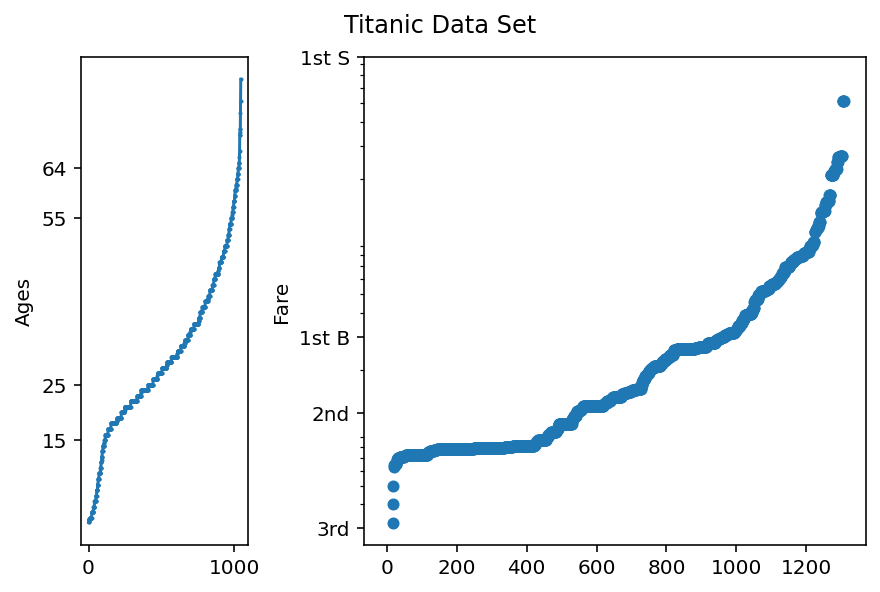

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, gridspec_kw={'width_ratios':[1,3]}, constrained_layout=True)
_ = fig.suptitle ("Titanic Data Set")
_ = ax1.plot(np.sort(df['age']), marker='o', markersize=1)
_ = ax1.set_ylabel("Ages")
_ = ax1.set_yticks([15,25, 55, 64])
_ = ax2.set_ylabel('Fare')
_ = ax2.plot(np.sort(df['fare']), marker='o', markersize=5, lineStyle="")
_ = ax2.set_yscale('log')
_ = ax2.set_yticks([3,12,30,870])
_ = ax2.set_yticklabels(['3rd','2nd','1st B','1st S'])

# Practice:
1. Flip-make the ages graph wider than the fares graph
2. Rotate: put the ages graph on top of the fares graph
3. Top-heavy: in the vertical orientation from 2, make the ages graph larger 
    + hint: there's a `height_ratios` gridspec_kw

/tmp/ipykernel_214762/3463504543.py:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  _ = ax2.plot(np.sort(df['fare']), marker='o', markersize=5, lineStyle="")


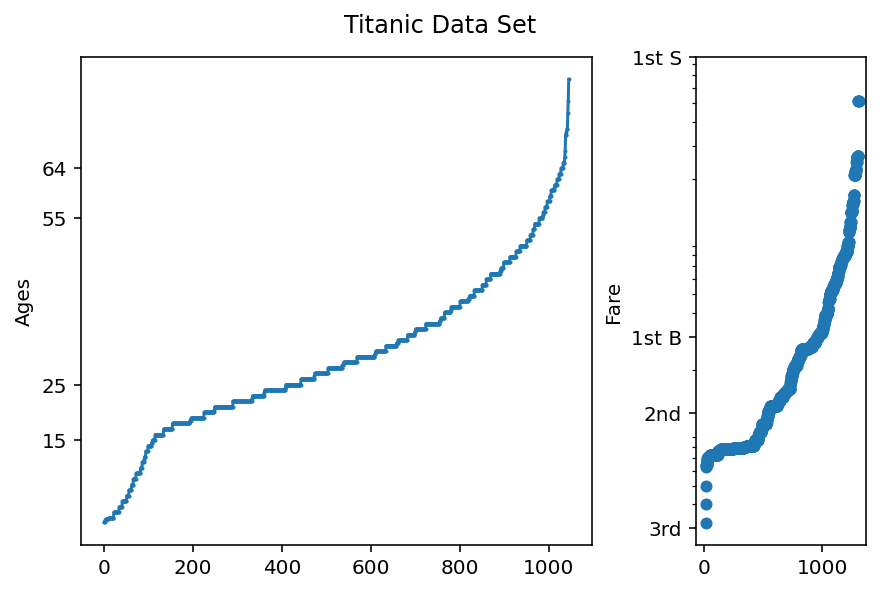

In [34]:
## Solution 1
fig, (ax1, ax2) = plt.subplots(ncols=2, gridspec_kw={'width_ratios':[3,1]}, constrained_layout=True)
_ = fig.suptitle ("Titanic Data Set")
_ = ax1.plot(np.sort(df['age']), marker='o', markersize=1)
_ = ax1.set_ylabel("Ages")
_ = ax1.set_yticks([15,25, 55, 64])
_ = ax2.set_ylabel('Fare')
_ = ax2.plot(np.sort(df['fare']), marker='o', markersize=5, lineStyle="")
_ = ax2.set_yscale('log')
_ = ax2.set_yticks([3,12,30,870])
_ = ax2.set_yticklabels(['3rd','2nd','1st B','1st S'])

/tmp/ipykernel_214762/3899748799.py:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  _ = ax2.plot(np.sort(df['fare']), marker='o', markersize=5, lineStyle="")


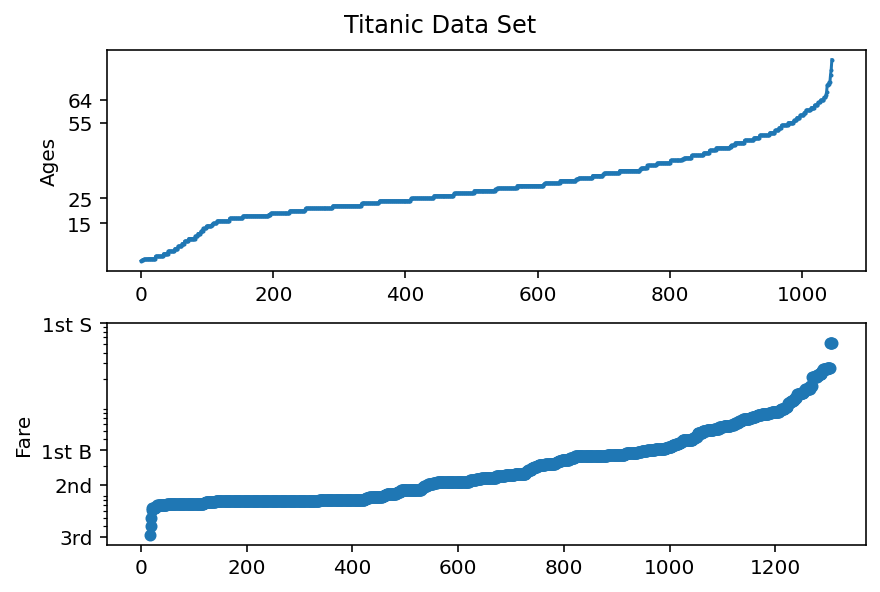

In [41]:
## Solution 2
fig, (ax1, ax2) = plt.subplots(nrows=2,constrained_layout=True)
_ = fig.suptitle ("Titanic Data Set")
_ = ax1.plot(np.sort(df['age']), marker='o', markersize=1)
_ = ax1.set_ylabel("Ages")
_ = ax1.set_yticks([15,25, 55, 64])
_ = ax2.set_ylabel('Fare')
_ = ax2.plot(np.sort(df['fare']), marker='o', markersize=5, lineStyle="")
_ = ax2.set_yscale('log')
_ = ax2.set_yticks([3,12,30,870])
_ = ax2.set_yticklabels(['3rd','2nd','1st B','1st S'])

/tmp/ipykernel_214762/3685984478.py:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  _ = ax2.plot(np.sort(df['fare']), marker='o', markersize=5, lineStyle="")


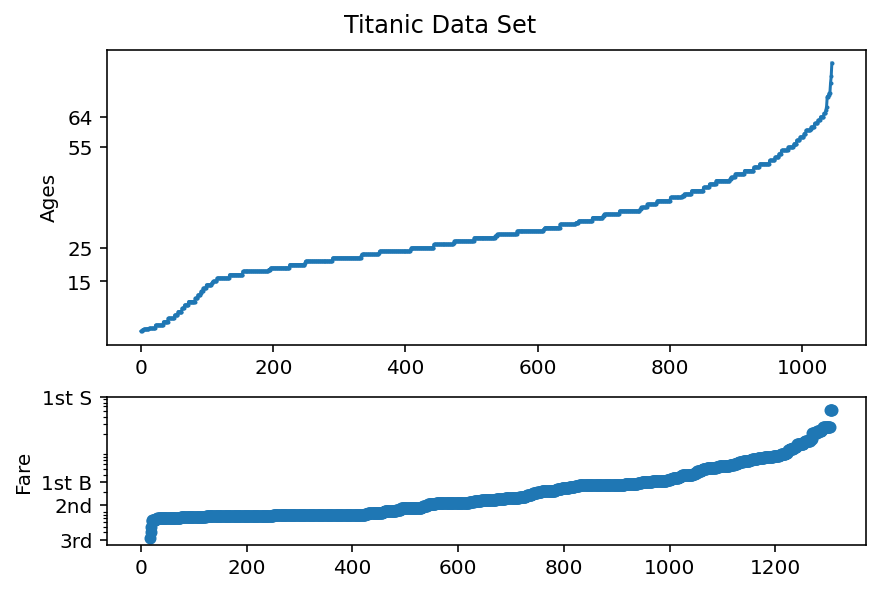

In [46]:
## Solution 3
fig, (ax1, ax2) = plt.subplots(nrows=2, gridspec_kw={'height_ratios':[2,1]}, constrained_layout=True)
_ = fig.suptitle ("Titanic Data Set")
_ = ax1.plot(np.sort(df['age']), marker='o', markersize=1)
_ = ax1.set_ylabel("Ages")
_ = ax1.set_yticks([15,25, 55, 64])
_ = ax2.set_ylabel('Fare')
_ = ax2.plot(np.sort(df['fare']), marker='o', markersize=5, lineStyle="")
_ = ax2.set_yscale('log')
_ = ax2.set_yticks([3,12,30,870])
_ = ax2.set_yticklabels(['3rd','2nd','1st B','1st S'])